In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import text
import os
import geopandas as gpd
import plotly 

In [8]:
host = 'localhost'
database = 'spatial'
user = 'postgres'
port = '5432'
password = os.getenv('SQL_PASSWORD')


In [9]:
connection_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"

engine = create_engine(connection_string)
insp = inspect(engine)
insp.get_table_names()

['spatial_ref_sys']

In [4]:
citi_text = """ select * from ch11.aussie_track_points
"""

tracks_points = gpd.read_postgis(citi_text, con=engine)

In [5]:
filtered_tracks_points = tracks_points[tracks_points.geometry.x < 153]



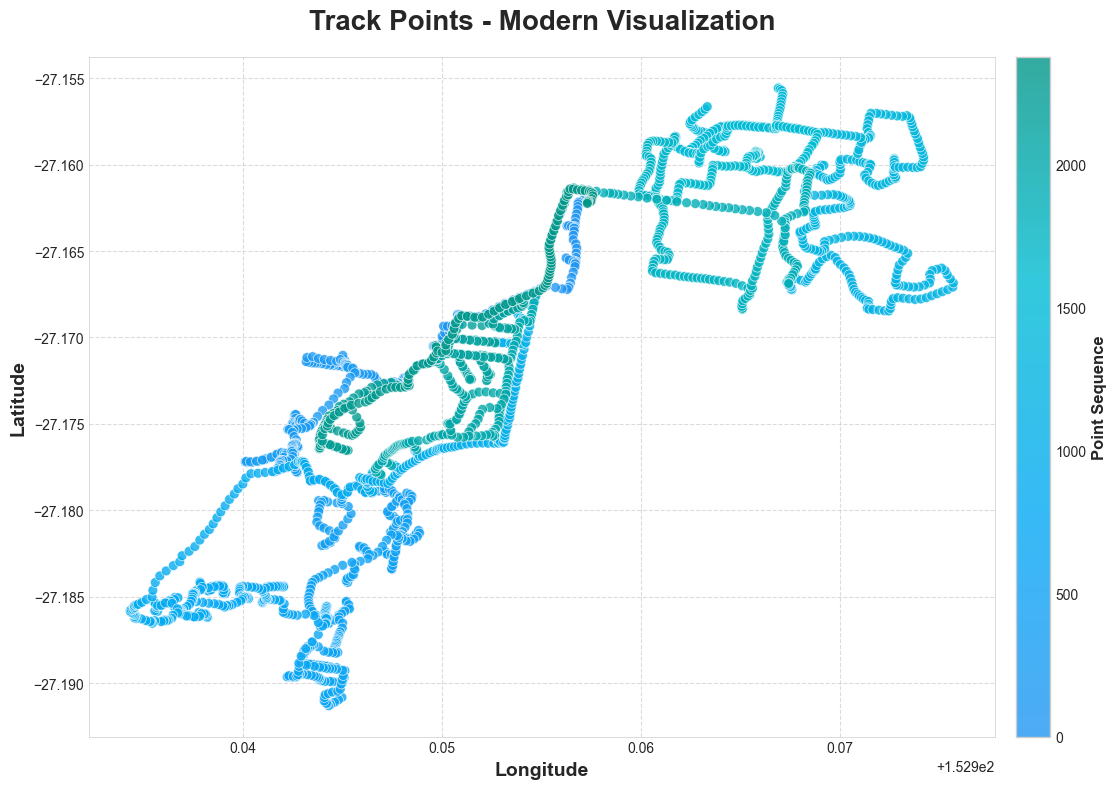

In [13]:
# Modern UI visualization using Matplotlib with a modern style
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Set a modern style for matplotlib
plt.style.use('seaborn-v0_8-whitegrid')

# Create a figure with a specific size for better visualization
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

# Extract coordinates from the geometry column
x = [point.x for point in filtered_tracks_points.geometry]
y = [point.y for point in filtered_tracks_points.geometry]

# Create a modern color gradient
colors = ["#2196F3", "#03A9F4", "#00BCD4", "#009688"]
n_bins = 100
cmap_name = 'modern_blue'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Create a scatter plot with modern styling
scatter = ax.scatter(
    x, y,
    c=np.arange(len(x)),  # Color points by sequence
    cmap=cm,
    alpha=0.8,
    s=50,  # Marker size
    edgecolor='white',
    linewidth=0.5
)

# Add a colorbar for visual reference
cbar = plt.colorbar(scatter, ax=ax, pad=0.02)
cbar.set_label('Point Sequence', fontsize=12, fontweight='bold')

# Set title and labels with modern typography
ax.set_title('Track Points - Modern Visualization', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Longitude', fontsize=14, fontweight='bold')
ax.set_ylabel('Latitude', fontsize=14, fontweight='bold')

# Customize grid
ax.grid(True, linestyle='--', alpha=0.7)

# Customize spines
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('#CCCCCC')
    spine.set_linewidth(0.5)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

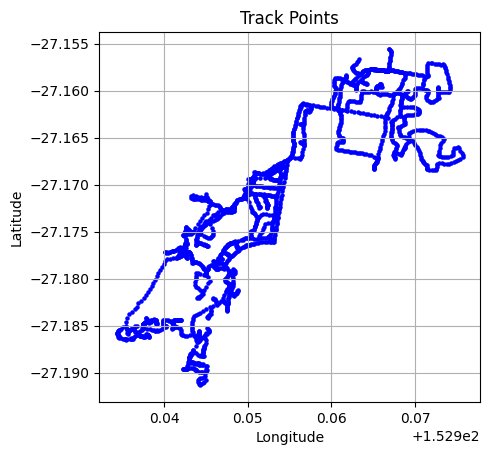

In [ ]:
# Create a plot of the tracks_points
filtered_tracks_points.plot(marker='o', color='blue', markersize=5)

# Add title and labels
plt.title("Track Points")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
